In [15]:
##Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
#Read csv file
df = pd.read_csv('Resources/random_sample_2.csv')
df[['SR Create TS', 'SR Close TS', 'Cust Contact TS', 'CQ Applied TS']] = df[['SR Create TS', 'SR Close TS', 'Cust Contact TS', 'CQ Applied TS']].astype('datetime64[ns]')

In [17]:
#Create new data with columns we're interested in
new_df = df[['OCPM #', 'Make/Miss', 'SR Create TS', 'SR Close TS', 'CQ Applied TS']]
new_df

,OCPM #,Make/Miss,SR Create TS,SR Close TS,CQ Applied TS
0,409RLFB,Make,2019-12-30 15:12:00,2020-01-03 21:13:00,2019-12-30 15:43:00
1,409PZJB,Make,2019-12-16 15:31:00,2019-12-18 16:00:00,2019-12-17 04:03:00
2,409R8PY,Miss,2019-12-26 08:19:00,2020-01-02 18:25:00,2019-12-26 08:35:00
3,409SY8W,Make,2020-01-08 15:17:00,2020-01-13 13:56:00,2020-01-09 09:47:00
4,409RLNN,Make,2019-12-30 16:07:00,2019-12-30 16:11:00,2019-12-30 16:11:00
...,...,...,...,...,...
373,409PLCP,Miss,2019-12-13 11:14:00,2019-12-19 21:34:00,2019-12-13 11:29:00
374,409Q4KB,Miss,2019-12-17 09:00:00,2019-12-31 11:40:00,2019-12-17 09:16:00
375,409QHRJ,Miss,2019-12-18 15:02:00,2019-12-26 17:47:00,2019-12-19 12:39:00
376,409R2F9,Miss,2019-12-23 07:58:00,2020-01-09 09:53:00,2019-12-23 08:08:00


In [18]:
#Add column to hold difference between SR Close TS and SR Create TS
new_df['CX - RC'] = (new_df.loc[:, 'SR Close TS'] - new_df.loc[:, 'SR Create TS'])

#Add column to hold difference between CQ Applied TS and SR Create TS
new_df['CQ - RC'] = (new_df.loc[:, 'CQ Applied TS'] - new_df.loc[:, 'SR Create TS'])

#Convert new cols to decimals
for index, rows in new_df.iterrows():
    new_df.iloc[index, 5] = rows[5].days + rows[5].seconds/(24*60*60)
    new_df.iloc[index, 6] = rows[6].days + rows[6].seconds/(24*60*60)

#Convert to float
new_df[['CX - RC', 'CQ - RC']] = new_df[['CX - RC', 'CQ - RC']].astype('float64')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.o

In [19]:
#Descriptive statistics for SR and CQ differences
summary = pd.DataFrame({
    'CX - RC': round(new_df['CX - RC'].describe(),2),
    'CQ - RC': round(new_df['CQ - RC'].describe(),2)
})
summary

,CX - RC,CQ - RC
count,378.00,378.00
mean,11.02,0.48
std,9.41,1.42
min,0.00,0.00
25%,4.02,0.01
50%,7.13,0.02
75%,16.18,0.47
max,43.02,19.78


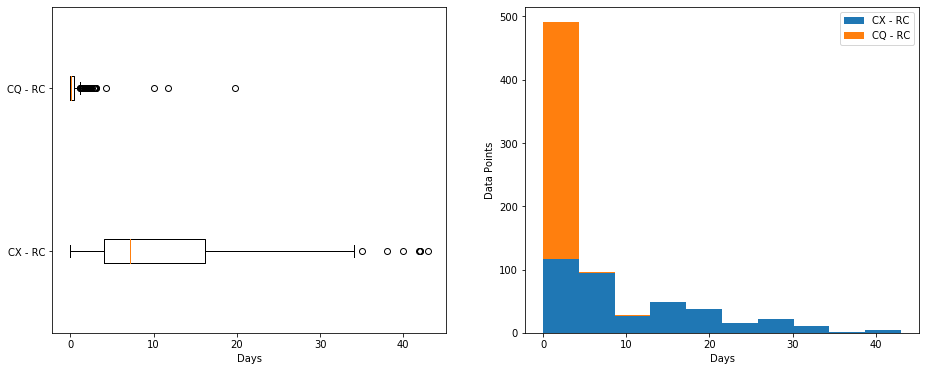

In [20]:
#Boxplot and histogram
data_CX = new_df['CX - RC']
data_RC = new_df['CQ - RC']
labels = ['CX - RC', 'CQ - RC']
plt.figure(figsize=(24,6))

#Boxplot
plt.subplot(131)
plt.boxplot([data_CX, data_RC], labels = labels, vert = False)
plt.xlabel('Days')

#Histogram
plt.subplot(132)
plt.hist([data_CX, data_RC], label = labels, stacked = True)
plt.xlabel('Days')
plt.ylabel('Data Points')
plt.legend()

plt.show()